In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import src.metrics as M 
import src.viz as V 


In [2]:
df_start = pd.read_csv("data/health_study_dataset.csv")
display(df_start.head())
display(df_start.info())
display(df_start.describe())

dup_mask = df_start.duplicated(keep=False)

dup_mask.sum()


,id,age,sex,height,weight,systolic_bp,cholesterol,smoker,disease
0,1,57,F,168.9,65.8,141.8,4.58,No,0
1,2,47,M,180.4,95.9,144.8,5.18,Yes,0
2,3,59,F,169.9,82.2,151.7,6.16,No,0
3,4,72,M,157.7,93.1,151.0,6.63,No,0
4,5,46,M,192.6,104.1,144.1,5.21,No,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


None

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


np.int64(0)

In [3]:
df = df_start.copy()
df["sex"] = df["sex"].astype("category")
df["smoker"] = df["smoker"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           800 non-null    int64   
 1   age          800 non-null    int64   
 2   sex          800 non-null    category
 3   height       800 non-null    float64 
 4   weight       800 non-null    float64 
 5   systolic_bp  800 non-null    float64 
 6   cholesterol  800 non-null    float64 
 7   smoker       800 non-null    category
 8   disease      800 non-null    int64   
dtypes: category(2), float64(4), int64(3)
memory usage: 45.7 KB


In [32]:
df[["age", "weight", "height", "systolic_bp", "cholesterol"]].agg(
    ["mean", "median", "min", "max"]
).round(2)

,age,weight,height,systolic_bp,cholesterol
mean,49.43,73.41,171.85,149.18,4.93
median,50.00,73.20,171.35,149.40,4.97
min,18.00,33.70,144.40,106.80,2.50
max,90.00,114.40,200.40,185.90,7.88


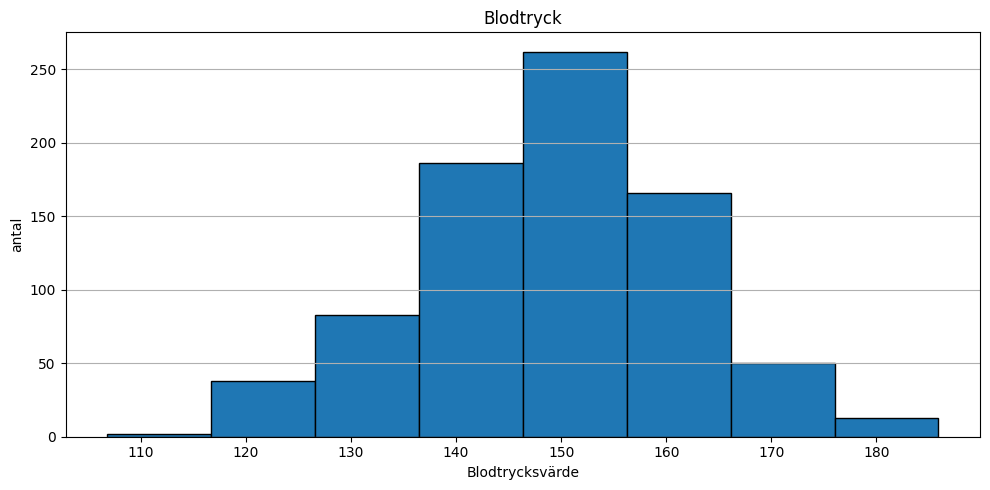

In [5]:
fig, ax = (plt.subplots(figsize = (10,5)))
V.histogram(ax, df["systolic_bp"], title = "Blodtryck", xlabel = "Blodtrycksvärde" )
plt.show()

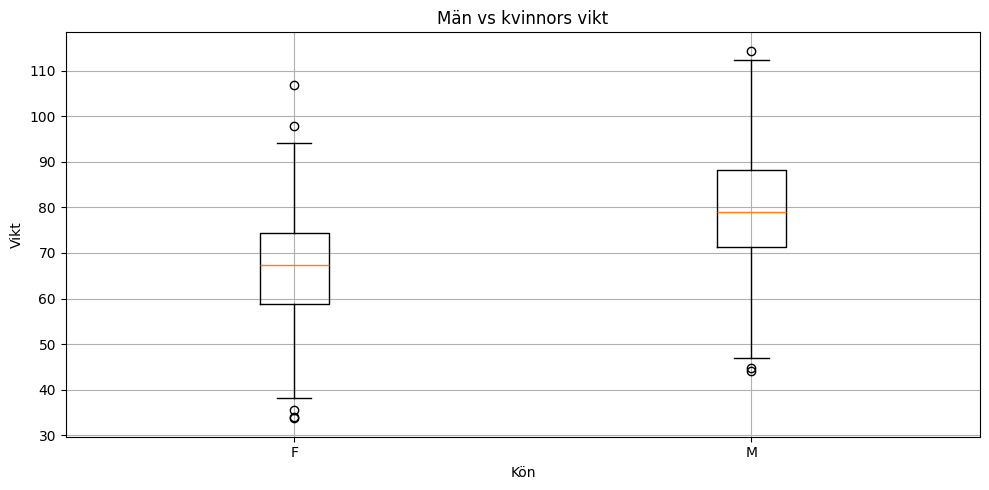

In [6]:
fig, ax = (plt.subplots(figsize = (10,5)))
V.boxplot(ax, [df.loc[df.sex == "F", "weight"], df.loc[df.sex == "M", "weight"]], ["F", "M"], "Män vs kvinnors vikt", "Kön", "Vikt")
plt.show()

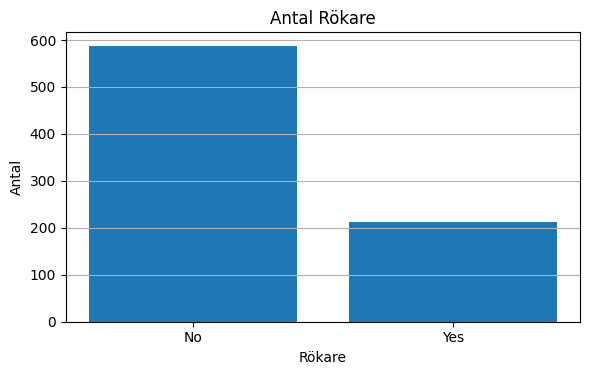

In [22]:
smoker = (df.groupby("smoker", observed= True)["id"]
          .count()
          .reset_index()
          )

fig, ax = plt.subplots(figsize = (6,4))
V.bar(ax, smoker.smoker, smoker.id, "Antal Rökare", "Rökare", "Antal")
plt.tight_layout()
plt.show()

In [24]:
disease = (df.groupby("disease",observed = True)["id"]
           .count()
           .reset_index()
           )

disease

,disease,id
0,0,753
1,1,47
